In [3]:
import pickle
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
gestos=["A","An","C","Co","I","M"]
y=0;Y=[];fila=[]
for g in gestos:
    ne=0
    for n in range(5):
        senial=g+str(n+1)+"_EMG.txt"
        with open('GitHub/'+senial, 'r', encoding='utf-8') as file:
            archivo = file.read()
            for f in archivo.split("\n"):
                columna=[]
                for c in f.split("  "):
                    if c!="":
                        columna.append(float(c))
                umbra=sum(abs(ac) for ac in columna)/8
                if umbra>=0.03:
                    columna.append(umbra)
                    fila.append(columna)
                    ne+=1
                    Y.append(y)
    y+=1

In [4]:
X=np.array(fila)
Y=np.array(Y)

# Crea el modelo de red neuronal con una capa oculta
mlp = MLPClassifier(hidden_layer_sizes=((100,30,10)), 
                    activation='logistic', 
                    solver='sgd', 
                    learning_rate_init=0.3,
                    max_iter=90000)

In [5]:
# Entrena el modelo en lotes y guarda los valores de pérdida
loss_values = []
classes = np.unique(Y)
print(classes)

[0 1 2 3 4 5]


In [6]:
# Entrenamiento
mlp.partial_fit(X[:1], Y[:1], classes=classes)
loss_values.append(mlp.loss_)
for i in tqdm(range(1, mlp.max_iter)):
    mlp.partial_fit(X, Y)
    loss_values.append(mlp.loss_)

100%|██████████████████████████████████████████████████████████████████████████| 89999/89999 [4:50:44<00:00,  5.16it/s]


In [7]:
# Evalúa el modelo (no se necesita un conjunto de prueba, pero puedes usar el mismo conjunto para evaluar)
accuracy = mlp.score(X,Y)
print("Precisión:", accuracy)

Precisión: 0.8092556989837957


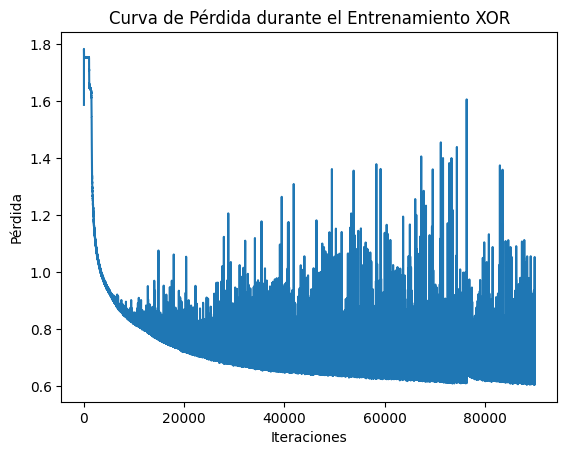

In [8]:
# Grafica la curva de pérdida
plt.plot(loss_values)
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.title("Curva de Pérdida durante el Entrenamiento XOR")
plt.show()

In [9]:

# Guardar el modelo
filename = 'mlp_model.pkl'
pickle.dump(mlp, open(filename, 'wb'))  # 'wb' es para escritura binaria

